In [22]:
#libraries to be used
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [4]:
#Custom Activation Functions
initializer0 = keras.initializers. RandomUniform(minval = -1, maxval =2)
initializer1 = keras.initializers. RandomUniform(minval = -1, maxval =2)

class Adaact(keras.layers.Layer):
    def __init__(self):
        super(Adaact, self).__init__()
        self.k0 = self.add_weight(name='k0', shape = (), initializer=initializer0, trainable=True)
        self.k1 = self.add_weight(name='k1', shape = (), initializer=initializer1, trainable=True)
        
    def call(self, inputs):
        return self.k0 + tf.multiply(inputs, self.k1)

In [5]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, kernel_size=(3, 3))(inputs)
adaact = Adaact()
x = adaact(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3))(x)
x = adaact(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_adaact")
model.summary()

Model: "mnist_adaact"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 26, 26, 32)   320         ['input_2[0][0]']                
                                                                                                  
 adaact_1 (Adaact)              multiple             2           ['conv2d_2[0][0]',               
                                                                  'conv2d_3[0][0]']               
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 32)  0           ['adaact_1[0][0]']    

C:\Users\telug\anaconda3\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [20]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 34s 77ms/step - loss: 0.0440 - accuracy: 0.9858 - val_loss: 0.0383 - val_accuracy: 0.9910
Epoch 2/15
422/422 [==============================] - 35s 84ms/step - loss: 0.0429 - accuracy: 0.9857 - val_loss: 0.0388 - val_accuracy: 0.9902
Epoch 3/15
422/422 [==============================] - 36s 85ms/step - loss: 0.0404 - accuracy: 0.9864 - val_loss: 0.0388 - val_accuracy: 0.9895
Epoch 4/15
422/422 [==============================] - 38s 90ms/step - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.0413 - val_accuracy: 0.9893
Epoch 5/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0382 - accuracy: 0.9871 - val_loss: 0.0375 - val_accuracy: 0.9905
Epoch 6/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.0353 - val_accuracy: 0.9908
Epoch 7/15
422/422 [==============================] - 43s 103ms/step - loss: 0.0374 - accuracy: 0.9876 - val_loss: 0.0404 - val_accurac

In [9]:
# final parameter values at the end of training
final_parameter_values = model.get_weights()
print(final_parameter_values)

[array([[[[-0.02403117,  0.16988131,  0.05628708, -0.01491756,
           0.00510367,  0.1006173 ,  0.06744067, -0.14933732,
          -0.00184069,  0.00038627,  0.12194931,  0.05525168,
           0.14955325, -0.17684539,  0.0168383 , -0.04666753,
          -0.082325  , -0.18759885,  0.00761537, -0.08232208,
           0.13682592,  0.06301643, -0.25865978, -0.15346447,
          -0.16176693, -0.03043972,  0.03960114,  0.10957118,
           0.13124615,  0.11921514,  0.06391111, -0.022453  ]],

        [[ 0.0955977 , -0.11949532,  0.08446911,  0.02241919,
          -0.09567817, -0.02006272, -0.06655791,  0.0967398 ,
          -0.0375165 ,  0.04876179,  0.00633458,  0.17261697,
          -0.2128802 , -0.17244674,  0.01986898, -0.01347788,
          -0.11378707,  0.06893189, -0.27370143, -0.06670171,
           0.09341762, -0.09992293, -0.05503926, -0.22486438,
           0.08979131,  0.05732937,  0.15010688,  0.00710787,
          -0.04653169,  0.03826183,  0.15270893, -0.05492403]],

 

In [10]:
print("AF coefficients (weights) {}".format(adaact.get_weights()))

AF coefficients (weights) [-0.06387945, 1.7510321]


In [12]:
# Obtain test loss and test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.03806436434388161
Test accuracy: 0.9883000254631042


In [13]:
# Obtain train loss and train accuracy
score = model.evaluate(x_train, y_train, verbose=0)
print("train loss:", score[0])
print("train accuracy:", score[1])

train loss: 0.02297869324684143
train accuracy: 0.9930999875068665


In [14]:
# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 2s 6ms/step


In [18]:
# Compute the F1-score
f1 = f1_score(y_true, y_pred, average='weighted')
print("f1 score is {}".format(f1))

f1 score is 0.9882981417071321


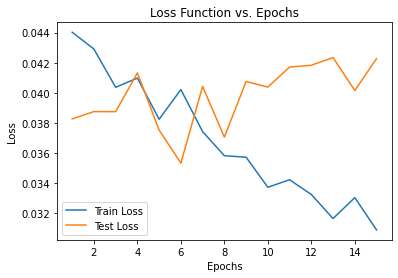

In [23]:
# Plot the loss function vs. epochs
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(range(1, epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, epochs+1), test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs. Epochs')
plt.legend()
plt.show()